In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import dedalus.public as de

In [2]:
print(de)

<module 'dedalus.public' from '/home/jsoishi/hg-projects/dedalus/dedalus/public.py'>


In [3]:
nz = 256
Pr = 6
T0 = 1
Ra = 100
Re = 100

In [4]:
z =de.Laguerre('z',nz,stretch=0.5)
d = de.Domain([z,],grid_dtype='float')

In [5]:
problem = de.LBVP(d,variables=['Ux','T','Uxz','Tz'])
#problem = de.NLBVP(d,variables=['Ux','T','Uxz','Tz'])
problem.parameters['Pr'] = Pr
problem.parameters['Uz'] = -Pr
problem.parameters['T0'] = Ra
problem.parameters['Re'] = Re

In [6]:
problem.add_equation("Pr*dz(Uxz) -Uz*dz(Ux) = 0")
problem.add_equation("dz(Tz) - Uz*Tz = 0")
problem.add_equation("dz(Ux) - Uxz = 0", tau=False)
problem.add_equation("dz(T) - Tz = 0", tau=False)

problem.add_bc('left(Ux) = -Pr*Re')
problem.add_bc('left(T) = T0')

/home/jsoishi/miniconda3/envs/dedalus/lib/python3.7/site-packages/scipy/special/orthogonal.py:205: RuntimeWarning: divide by zero encountered in true_divide
  w = 1.0 / (fm * dy)
/home/jsoishi/miniconda3/envs/dedalus/lib/python3.7/site-packages/scipy/special/orthogonal.py:205: RuntimeWarning: overflow encountered in true_divide
  w = 1.0 / (fm * dy)
/home/jsoishi/miniconda3/envs/dedalus/lib/python3.7/site-packages/scipy/special/orthogonal.py:211: RuntimeWarning: invalid value encountered in multiply
  w *= mu0 / w.sum()


In [7]:
solver = problem.build_solver()

2019-11-30 13:33:04,077 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.8e+01/s


In [8]:
solver.solve()

In [9]:
zg = z.grid()
T_analytic = Ra*np.exp(-Pr*zg)
U_analytic = -Pr*Re*np.exp(-zg)

<IPython.core.display.Javascript object>


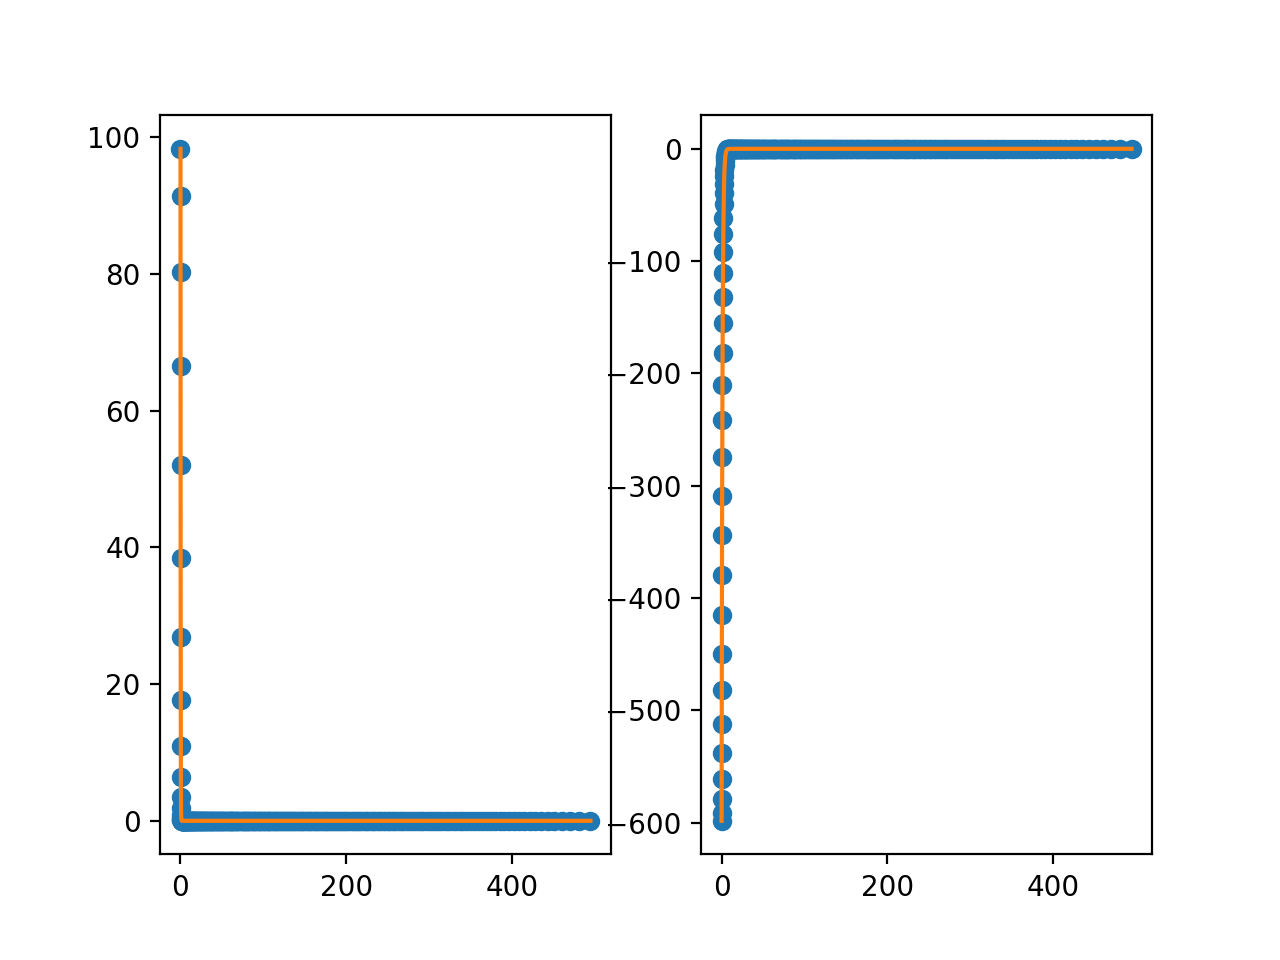

/home/jsoishi/hg-projects/dedalus/dedalus/core/basis.py:1471: RuntimeWarning: overflow encountered in exp
  forward_mat *= np.exp(native_grid)
/home/jsoishi/hg-projects/dedalus/dedalus/core/basis.py:1471: RuntimeWarning: invalid value encountered in multiply
  forward_mat *= np.exp(native_grid)


In [10]:
plt.figure()
plt.subplot(121)
plt.plot(zg, solver.state['T']['g'],'o')
plt.plot(zg, T_analytic)
plt.subplot(122)
plt.plot(zg, solver.state['Ux']['g'],'o')
plt.plot(zg, U_analytic)

<IPython.core.display.Javascript object>


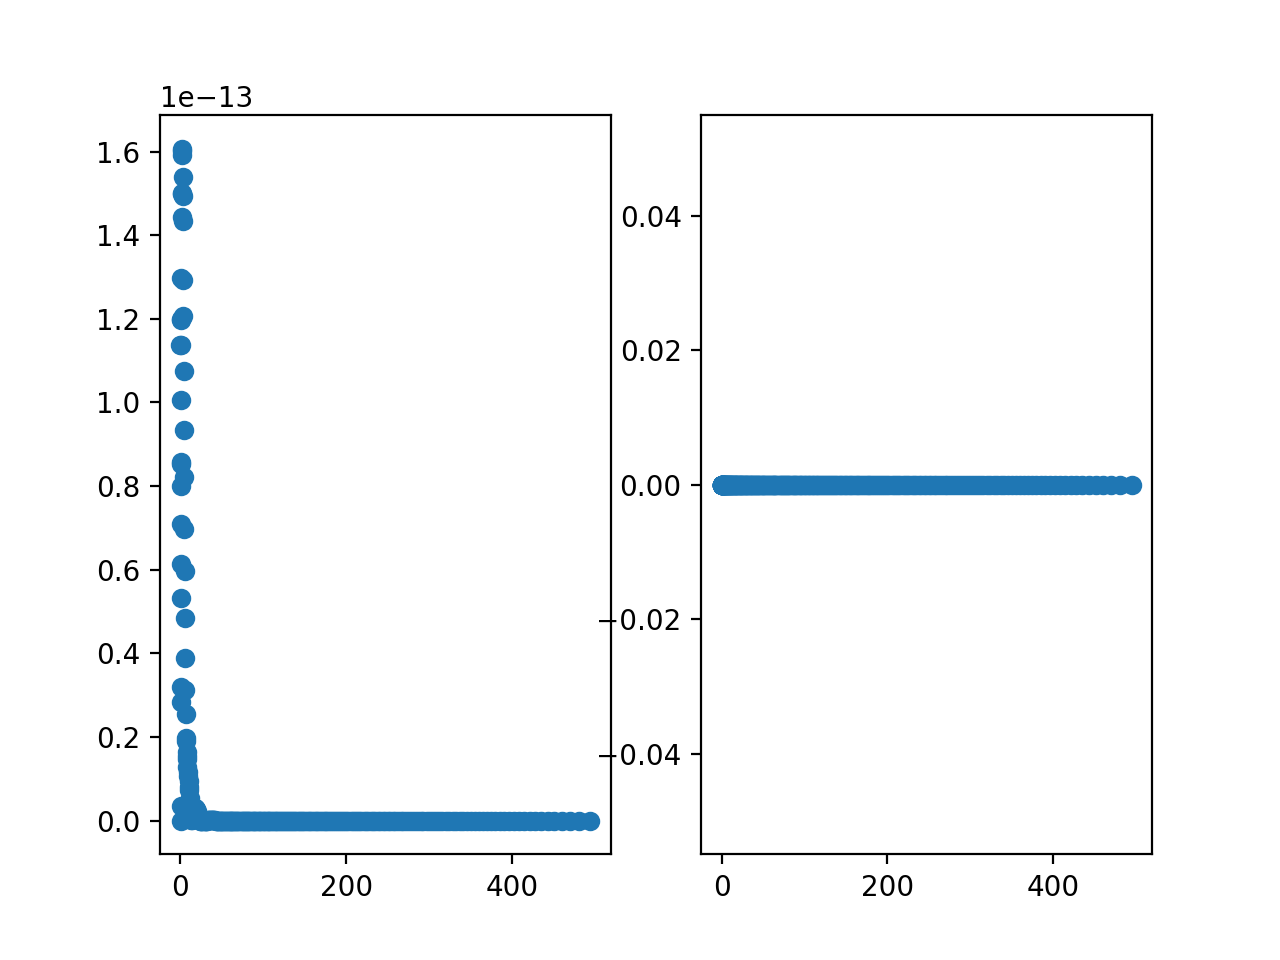

In [11]:
plt.figure()
plt.subplot(121)
plt.plot(zg, np.abs(solver.state['T']['g']-T_analytic),'o')
plt.subplot(122)
plt.plot(zg, np.abs(solver.state['Ux']['g']-U_analytic),'o')
